
* image classification in cnn model:

Convolutional Neural Networks (CNNs) process images by extracting feature
through convolutional and pooling layers, ultimately leading to classification or object recognition. They learn hierarchical representations, starting with low-level features like edges and progressing to higher-level features such as shapes and objects. This hierarchical structure is achieved by applying filters (kernels) to the input image and then using pooling layers to reduce dimensionality, further enhancing the network's efficiency and generalization capabilities.

# steps:
1.import neccessary libary


2.load datasets



3.data processing

4.Buliding and connventional neural networks

5.trining model

6.Evalting model





In [ ]:
#image classification in cnn model
#1)import neccessary libaray
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


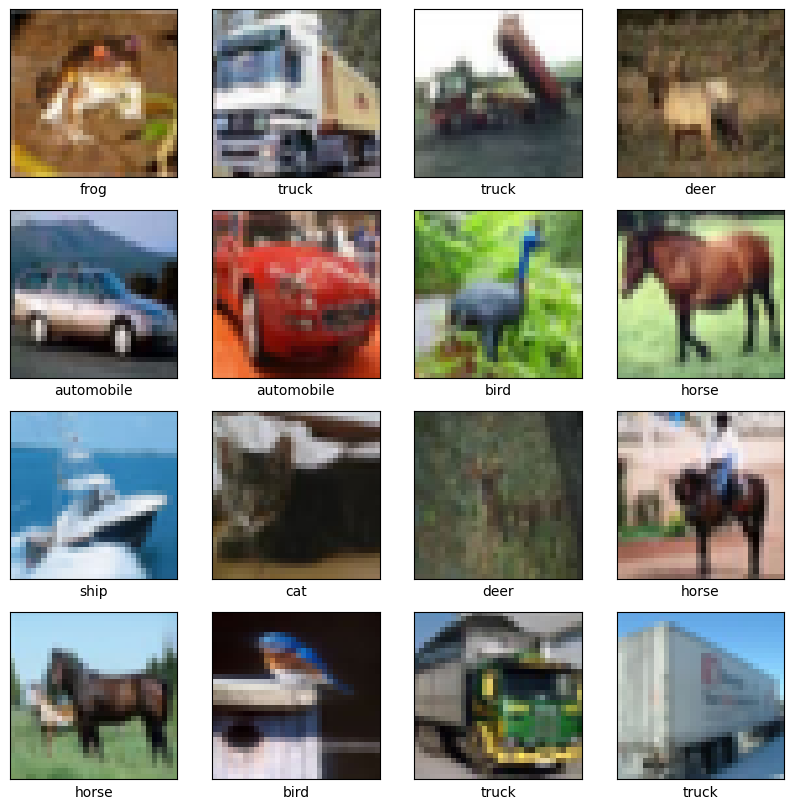

In [ ]:
#2)load datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
#normlize pixel values to be between 0 and 1
x_train, x_test = x_train/255.0, x_test/255.0
#show simple image from the dataset
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
#3.dataprocessing
#one-hotencoded label
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
#spilt training data into train and validation sets
x_val = x_train[:-5000]
y_val = y_train[:-5000]
x_train = x_train[-5000:]
y_train = y_train[-5000:]


In [ ]:
#4.Build the cnn model
#well created cnn model conventional ,pooling and dense layer
#Build the cnn model

model = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2,2)),
          layers.Conv2D(64, (3, 3), activation='relu'),
          layers.MaxPooling2D((2,2)),
          layers.Conv2D(64, (3, 3), activation='relu'),
          layers.Flatten(),
          layers.Dense(64, activation='relu'),
          layers.Dense(10, activation='softmax'),

])
#complie the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#5)train the model
#well trian the model for 10 epochs and the validation data to mointor performance
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.1727 - loss: 2.1640 - val_accuracy: 0.3064 - val_loss: 1.9131
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - accuracy: 0.3372 - loss: 1.7851 - val_accuracy: 0.3790 - val_loss: 1.6644
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.4086 - loss: 1.5962 - val_accuracy: 0.4281 - val_loss: 1.5726
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.4450 - loss: 1.4979 - val_accuracy: 0.4334 - val_loss: 1.5774
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.4838 - loss: 1.3961 - val_accuracy: 0.4461 - val_loss: 1.4965
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 160ms/step - accuracy: 0.5111 - loss: 1.3404 - val_accuracy: 0.4965 - val_loss: 1.3878
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - accuracy: 0.5627 - loss: 1.1936 - val_accuracy: 0.5117 - val_loss: 1.3722
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.5797 - loss: 1.19

313/313 - 3s - 11ms/step - accuracy: 0.0908 - loss: 2.3077
Test accuracy:', 0.0908


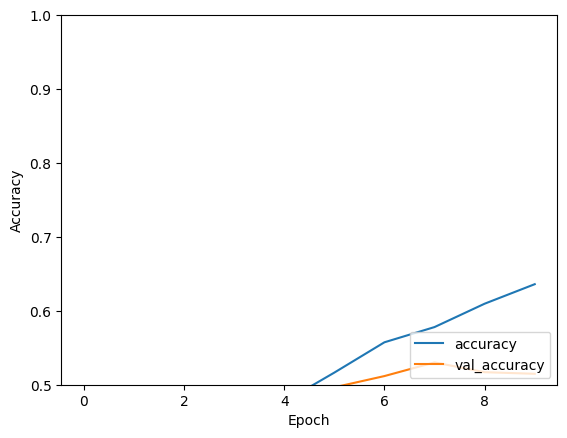

In [ ]:

#6)Evalute the model
#finally,we well evalute the model one test dataset and plot the training process
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print(f"Test accuracy:', {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
# test_loss, test_acc = model.evaluate(x_test, y_test)




*   random_indx:Randomly selection an index from the test to show a sample image
*   np.expand_dims(input_image,axis=0):adds a batch dimensation to the input image so that it can be fed into the model(expected input shape is[batch_size,height,width,channel])
*  model.predict():uses the trained cnn model to predict the class probablities of the images
*   np.argmax(predictions):finds the class index with the hightest predicted probability.
* plt.imshow():display the images
* plt.title:predicted class names as the title
* print the actual label of the images for comparison










1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Actual label: dog


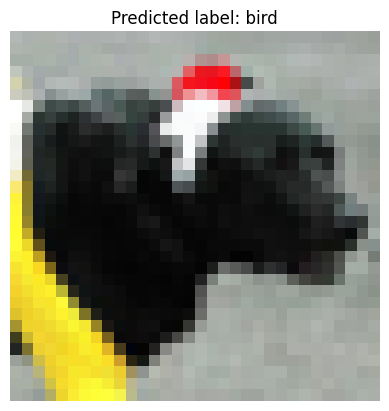

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#CIFAR 10 class names
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#select a random images from the test set
random_idx=np.random.randint(0,x_test.shape[0])
input_image=x_test[random_idx]
#add a batch dimension (model excepts inputs of shapes[batch_size,height,width,channel])
input_image_reshaped=np.expand_dims(input_image,axis=0)
#predict class of the images using the cnn
prediction=model.predict(input_image_reshaped)
prediction_lable=np.argmax(prediction)
#Display the images with predicated label
plt.imshow(input_image)
plt.title(f"Predicted label: {class_names[prediction_lable]}")
plt.axis('off')
#print the actual label(for comparision)
actual_label=y_test[random_idx]
#get the index of actual class using argmax
actual_class_index=np.argmax(actual_label)
print(f"Actual label: {class_names[actual_class_index]}")





CNNs play a crucial role in object detection by performing three key tasks: classification, localization (bounding box prediction), and sometimes segmentation. They learn to identify objects, locate them in an image, and even define their precise shape. This process involves feature extraction, classification based on these features, and then refining the location of objects

object detection for images

In [ ]:
#object detection using pytorch Faster Rccn model
#1step
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'# select any iamge from google

--2025-05-28 01:39:53--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.230.233, 52.217.168.193, 3.5.28.147, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.230.233|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.02s   

2025-05-28 01:39:54 (1.64 MB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [ ]:
ig=Image.open("/content/000000037777.jpg")#open files and copypath liftside

In [ ]:
tranform=T.ToTensor()#help of transfer tensor format from images
img=tranform(ig)

In [ ]:
with torch.no_grad():#model prediction
  pred=model([img])

In [ ]:
pred #no_of labels and scores its x1,y1 top,and bottom x2,y2

[{'boxes': tensor([[291.8007,  75.4907, 351.0379, 229.7333],
          [137.4995, 126.4641, 196.7451, 192.7782],
          [233.8998, 187.4761, 257.3713, 206.0314],
          [ 90.1806, 183.4493, 288.7284, 227.4105],
          [215.5326, 186.7111, 232.5018, 201.2200],
          [229.1946, 178.4547, 242.4028, 189.1366],
          [204.3889, 187.5528, 220.3058, 207.7724],
          [231.4346, 200.6802, 247.8696, 217.5509],
          [217.1698, 200.3502, 231.5009, 214.5559],
          [204.0359, 181.5956, 255.1724, 215.4856],
          [ 98.9669, 120.1149, 110.5809, 174.5164],
          [102.2467, 119.0014, 109.8358, 135.8731],
          [264.9863, 133.9124, 294.1249, 137.5284],
          [232.7792, 188.8490, 246.7510, 200.8903],
          [256.4788, 132.5554, 295.4839, 138.3106],
          [175.0202, 110.8700, 185.6927, 137.3661],
          [273.3569, 135.1965, 294.8690, 137.8414],
          [263.4073, 128.6209, 298.7946, 137.3732],
          [197.2355, 181.2733, 263.8224, 219.3763],
   

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes,labels,scores=pred[0]["boxes"],pred[0]["labels"],pred[0]["scores"]

In [ ]:
scores>0.8#80% percentage values

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [ ]:
torch.argwhere(scores>0.8)#at position 0,1,2,3,4,5 Element at index 1 (value = 0.8) and
#Element at index 4 (value = 0.8)
#satisfy the condition > 0.8.

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [ ]:
torch.argwhere(scores>0.8).shape[0]

10

In [ ]:
num=torch.argwhere(scores>0.8).shape[0]#
num

10

In [ ]:
#all class in list
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]


In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX

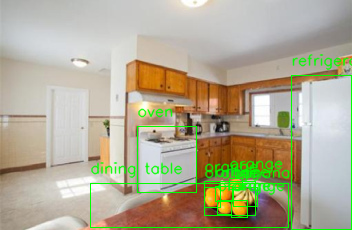

In [ ]:
#read the images
igg=cv2.imread("/content/000000037777.jpg")#Loads the image from the specified path.
#igg will be a NumPy array representing the image.
for i in range(num):
  x1,y1,x2,y2=bboxes[i].numpy().astype(int)#Gets the bounding box coordinates for the i-th detected object.
#Converts them to NumPy array and then to integers.
#x1, y1 is the top-left corner and x2, y2 is the bottom-right corner.
  class_name=coco_names[labels.numpy()[i]-1]#Subtracts 1 because coco_names is 0-indexed but labels typically start at 1 (for COCO dataset).
  igg=cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)#Draws a green rectangle on the image from (x1, y1) to (x2, y2) with thickness 1.
  igg=cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(0,255,0),1,cv2.LINE_AA)#Adds text (the class name) slightly above the top-left corner of the bounding box.
#font is assumed to be predefined (e.g., cv2.FONT_HERSHEY_SIMPLEX).
#Text is green and of small size (0.5).
cv2_imshow(igg)


In [ ]:
labels

tensor([82, 79, 52, 67, 55, 55, 55, 55, 55, 55, 64, 64, 81, 52, 81, 44, 81, 81,
        51, 55, 81, 67, 81, 44, 55, 55, 82, 84, 55, 62, 52, 81, 86, 81, 52, 86,
        47, 55, 44, 67, 63, 52, 82, 81, 81, 44, 52, 55, 52, 55, 55, 81, 80, 55,
        44, 80, 62, 47, 81, 63, 55, 81, 55, 47])

object detection in image in cnn


In [ ]:
#how to access in gethub link clone
#https://www.youtube.com/watch?v=eZA_G-3O-i4 link
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv

Cloning into 'Faster_RCNN_Opencv'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 8 (from 1)
Receiving objects: 100% (18/18), 57.35 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
weightsPath = "/content/Faster_RCNN_Opencv/frozen_inference_graph.pb"
configPath = "/content/Faster_RCNN_Opencv/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

#define the model
net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)

#read the iamges h w
image = cv2.imread("/content/Faster_RCNN_Opencv/doggo.jpg")
(H, W) = image.shape[:2]

#image conveted blobfromiamge
blob = cv2.dnn.blobFromImage(image, swapRB=True, crop=False)
net.setInput(blob)
boxes = net.forward(["detection_out_final"])
output = boxes[0].squeeze()
output


array([[ 0.        , 17.        ,  0.8920536 ,  0.16641064,  0.3825718 ,
         0.4217565 ,  0.9071655 ],
       [ 0.        ,  1.        ,  0.8750942 ,  0.17307138,  0.23415674,
         0.7514136 ,  0.7281058 ],
       [ 0.        ,  2.        ,  0.85852927,  0.60989845,  0.14240737,
         0.9072679 ,  0.29413992],
       [ 0.        , 16.        ,  0.5722485 ,  0.17602229,  0.36656025,
         0.42700827,  0.93689704],
       [ 0.        ,  7.        ,  0.3091168 ,  0.61198306,  0.14173536,
         0.90506196,  0.2957927 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.    

In [ ]:
output[: , 2][:5] , output[: , 1][:5]

(array([0.8920536 , 0.8750942 , 0.85852927, 0.5722485 , 0.3091168 ],
       dtype=float32),
 array([17.,  1.,  2., 16.,  7.], dtype=float32))

In [ ]:
output[: , 3:][:5]

array([[0.16641064, 0.3825718 , 0.4217565 , 0.9071655 ],
       [0.17307138, 0.23415674, 0.7514136 , 0.7281058 ],
       [0.60989845, 0.14240737, 0.9072679 , 0.29413992],
       [0.17602229, 0.36656025, 0.42700827, 0.93689704],
       [0.61198306, 0.14173536, 0.90506196, 0.2957927 ]], dtype=float32)

In [ ]:
num = np.argwhere(output[: , 2] > 0.8).shape[0]

In [ ]:

font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:

img = cv2.imread("/content/Faster_RCNN_Opencv/doggo.jpg")
for i in range(num):
  x1n , y1n , x2n , y2n = output[i , 3:]
  x1 = int(x1n * W)
  y1 = int(y1n * H)
  x2 = int(x2n * W)
  y2 = int(y2n * H)
  img = cv2.rectangle(img , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 3)
  class_name = coco_names[int(output[i , 1])]
  img = cv2.putText(img , class_name , (x1 , y1 - 10) , font , 0.5 ,
                    (255 , 0 , 0) , 1 , cv2.LINE_AA)

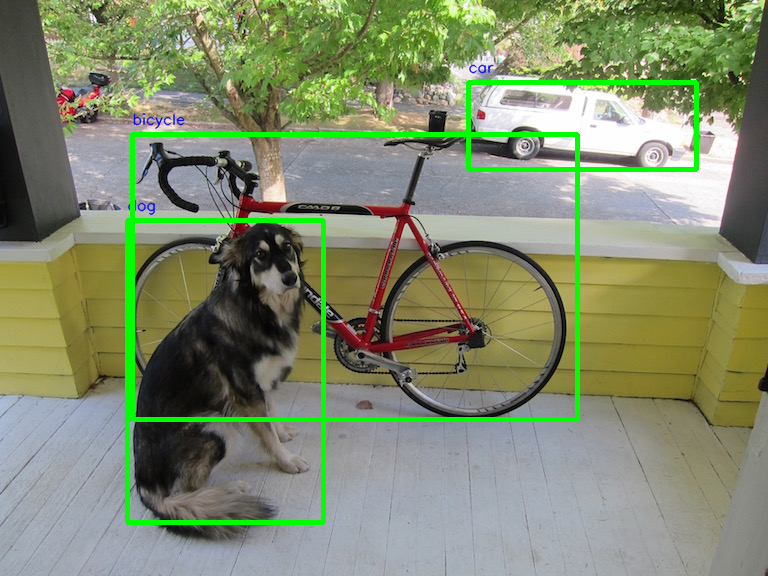

In [ ]:
cv2_imshow(img)

object dediction in torch in cnn model image
Object detection is a crucial aspect of computer vision, enabling systems to identify and locate objects within images. One of the pioneering methods in this domain is the Region-based Convolutional Neural Network (R-CNN). This article delves into the mechanics of R-CNN, explaining its architecture, workflow, and its role in advancing object detection.

In [ ]:
#object dediction in cnn model by using torch
import torch
import torchvision

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 116MB/s]


In [ ]:
model.eval() # Need to put the model in evaluation mode

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# We will now get a list of class names for this model, i will link the notebook ni the description.
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
from PIL import Image
import numpy as np
from io import BytesIO # For url images
import requests
from torchvision import transforms as T

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For retina displays

In [ ]:
def get_prediction(img, threshold=0.5):
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img]) # We have to pass in a list of images
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # If using GPU, you would have to add .cpu()
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding Boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
  pred_box = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_box, pred_class

In [ ]:
from urllib.request import urlopen
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
  resp = urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, readFlag)
  return image

In [ ]:
import random
def object_detection(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3, url=False):
  if url:
    img = url_to_image(img_path) # If on the internet.
    # Not all images will work though.
  else:
    img = cv2.imread(img_path) # If Local

  boxes, pred_clas = get_prediction(img, threshold=threshold)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    r, g, b = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) # Random Color
    cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(r, g, b), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img, pred_clas[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (r, g, b), thickness=text_th)
  plt.figure(figsize=(15, 15))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
# First, local file
!wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg -O car.jpg

--2025-05-28 10:46:32--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/10best-cars-group-cropped-1542126037.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2178423 (2.1M) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]   2.08M  --.-KB/s    in 0.07s   

2025-05-28 10:46:32 (28.5 MB/s) - ‘car.jpg’ saved [2178423/2178423]



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


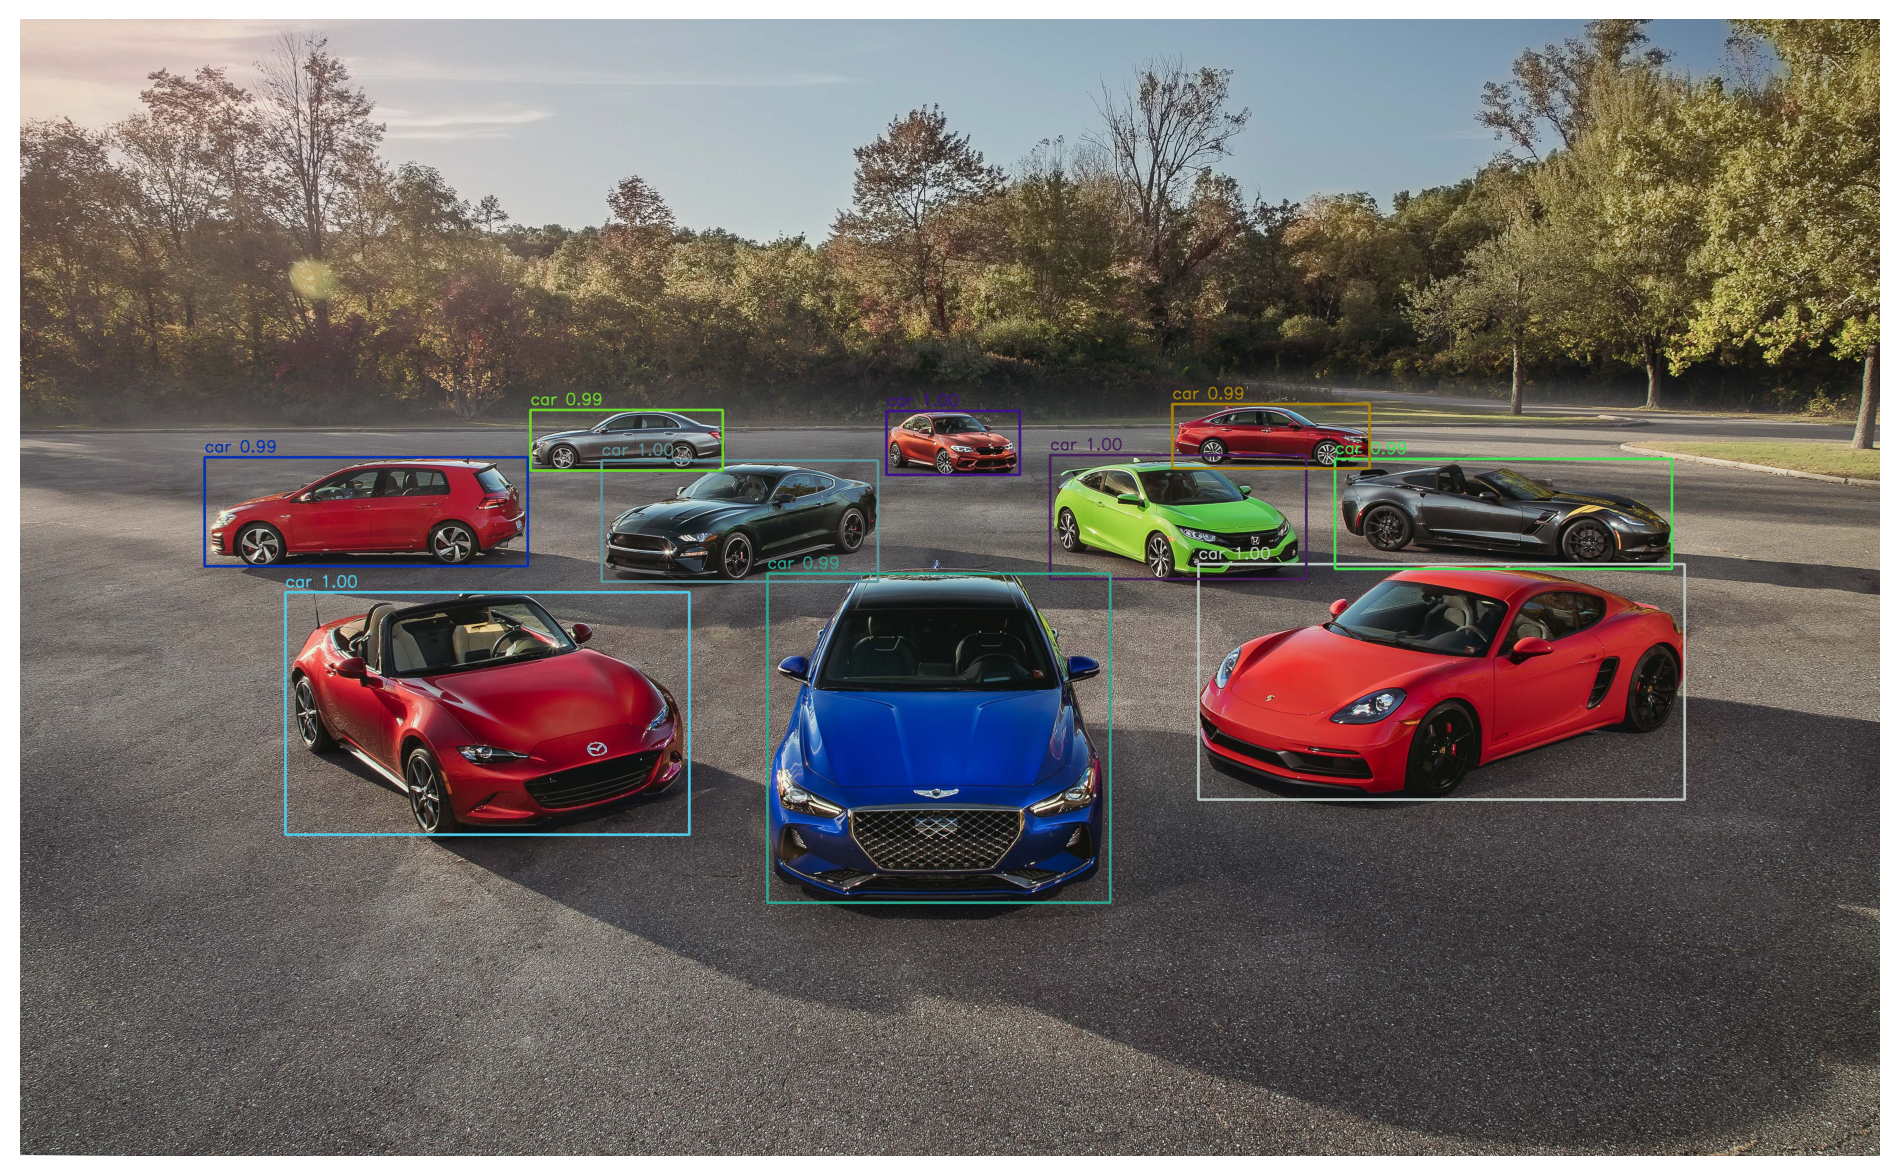

In [ ]:
#object detection in pytorch
#eg1:car
import cv2
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import random

# Load pre-trained model ONCE
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load image
img_path = '/content/car.jpg'
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform for model
transform = transforms.ToTensor()
img_tensor = transform(image_rgb)

# Predict
with torch.no_grad():
    preds = model([img_tensor])[0]

# COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Draw boxes
for box, label, score in zip(preds['boxes'], preds['labels'], preds['scores']):
    if score > 0.5:
        x1, y1, x2, y2 = box.int().tolist()
        color = tuple(random.randint(0, 255) for _ in range(3))
        label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 3)
        cv2.putText(image_rgb, f"{label_name} {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Show image
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


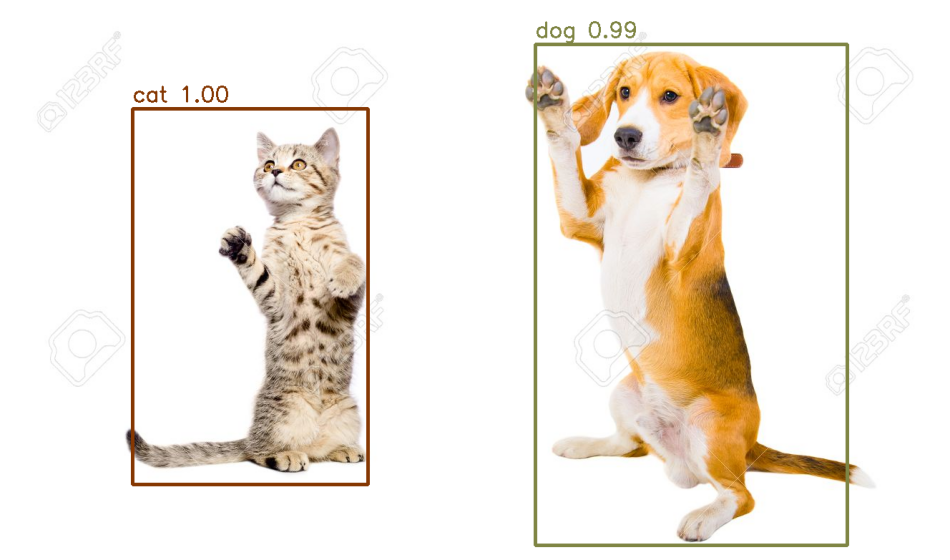

In [ ]:
#object detection in pytorch
#eg2:cat and dog legs
import cv2
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import requests
import numpy as np

# Load image from URL
img_url = 'https://previews.123rf.com/images/sonsedskaya/sonsedskaya1409/sonsedskaya140900049/32231139-cat-and-dog-standing-on-his-hind-legs.jpg'
response = requests.get(img_url)
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform for model
transform = transforms.ToTensor()
img_tensor = transform(image_rgb)

# Load pre-trained model ONCE
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Predict
with torch.no_grad():
    preds = model([img_tensor])[0]

# COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',

]

# Draw boxes
for box, label, score in zip(preds['boxes'], preds['labels'], preds['scores']):
    if score > 0.5:
        x1, y1, x2, y2 = box.int().tolist()
        color = tuple(random.randint(0, 255) for _ in range(3))
        label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 3)
        cv2.putText(image_rgb, f"{label_name} {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Show image
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


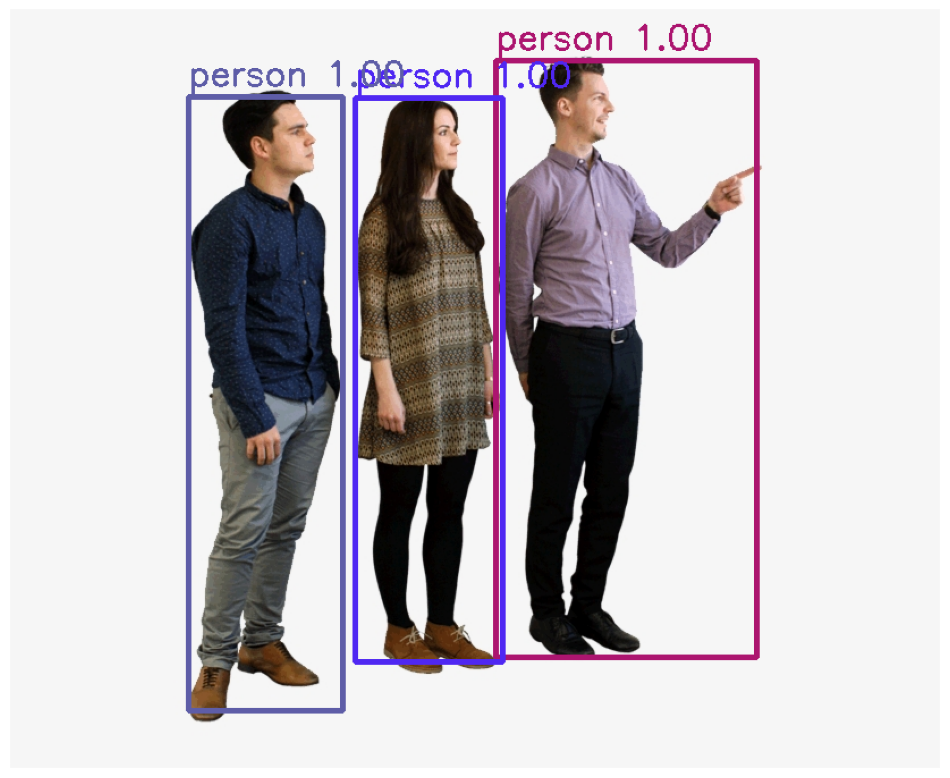

In [ ]:
#object detection in pytorch
#eg3:person
import cv2
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import random
import requests
import numpy as np

# Load image from URL
img_url = 'https://www.seekpng.com/png/detail/74-743158_people-pointing-png-standing.png'
response = requests.get(img_url)
image = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform for model
transform = transforms.ToTensor()
img_tensor = transform(image_rgb)

# Load pre-trained model ONCE
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Predict
with torch.no_grad():
    preds = model([img_tensor])[0]

# COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person','bicycle'
]

# Draw boxes
for box, label, score in zip(preds['boxes'], preds['labels'], preds['scores']):
    if score > 0.5:
        x1, y1, x2, y2 = box.int().tolist()
        color = tuple(random.randint(0, 255) for _ in range(3))
        label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 3)
        cv2.putText(image_rgb, f"{label_name} {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Show image
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
!pip install face_recognition
from imutils import paths
import face_recognition
import pickle
import cv2
import os
#get paths of each file in folder named images
#images here contain my data(folders of various persons)
imagepaths=list(paths.list_images("/content/Imagedata"))
knownEncodings=[]
knownNames=[]
# loop over the image paths
for (i,ipath) in enumerate(imagepaths):
  # extract the person name from the image path
  name=ipath.split(os.path.sep)[-2]
  #load the input and convert it from BGR(open cv ordering)
  #to dlib ordering(RGB)
  image=cv2.imread(ipath)
  rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  #Use Face_recognition to locate faces
  boxes=face_recognition.face_locations(rgb,model='hog')
  # compute the facial embedding for the face
  encodings=face_recognition.face_encodings(rgb,boxes)
  # loop over the encodings
  for encoding in encodings:
    knownEncodings.append(encoding)
    knownNames.append(name)
    #dump the facial encodings + names to disk
data={"encodings":knownEncodings,"names":knownNames}
f=open("face_enc","wb")
f.write(pickle.dumps(data))
f.close()

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/.tmpONMNjW/sdists-v9/pypi/dlib/19.24.6/wW5nPA3Q5ZpFFG_TLcN-X/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

This code helps in detecting and recognizing the face

In [ ]:
from google.colab.patches import cv2_imshow
import face_recognition_models
import face_recognition
import imutils
import pickle
import time
import cv2
#find path of xml file containing haarcascade file
cascPath=os.path.dirname(
    cv2.__file__)+"/models/face_recognition_models/haarcascade_frontalface_default.xml"
    # load the harcaascade in the cascade classifier
faceCascade = cv2.CascadeClassifier(cascPathface)
# load the known faces and embeddings saved in last file
data = pickle.loads(open('face_enc', "rb").read())
#Find path to the image you want to detect face and pass it here
image = cv2.imread("/content/rps20201230_170445.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
#The facial embedding for face in input
boxes = face_recognition.face_locations(rgb,model='hog')
encodings = face_recognition.face_encodings(rgb, boxes)
names = []
# loop over the facial embeddings incase
# we have multiple embeddings for multiple faces
for encoding in encodings:
  #Compare encodings
  matches = face_recognition.compare_faces(data["encodings"],encoding)
  name = "Unknown"
  # check to see if we have found a match
  if True in matches:
    #Find positions at which we get True and store them
    matchedIdxs = [i for (i, b) in enumerate(matches) if b]
    counts = {}
    # loop over the matched indexes and maintain a count for
    # each recognized face face
    for i in matchedIdxs:
      #Check the names at respective indexes we stored in matchedIdxs
      name = data["names"][i]
      #increase count for the name we got
      counts[name] = counts.get(name, 0) + 1
      #set name which has highest count
      name = max(counts, key=counts.get)
    # update the list of names
    names.append(name)
    # loop over the recognized faces
    for ((x, y, w, h), name) in zip(boxes, names):
      # rescale the face coordinates
      # draw the predicted face name on the image
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
      cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
        0.75, (0, 255, 0), 2)
    cv2_imshow(image)
    # cv2.waitKey(0)

RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/.tmpONMNjW/sdists-v9/pypi/dlib/19.24.6/wW5nPA3Q5ZpFFG_TLcN-X/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

face recognition in cnn


In [ ]:
!pip install face_recognition
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow # Import cv2_imshow for displaying images in Colab

# --- Modify these paths to point to images in your Colab environment ---
# Example: If you upload images to /content/
imgReal_path = '/content/Shivam2.jpg' # Replace with the actual path to your image
imgTest_path = '/content/1363056845618.jpg' # Replace with the actual path to your test image
# ---------------------------------------------------------------------

try:
    imgReal = face_recognition.load_image_file(imgReal_path)
    imgReal = cv2.cvtColor(imgReal, cv2.COLOR_BGR2RGB)

    imgTest = face_recognition.load_image_file(imgTest_path)
    imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

    # Find face locations and encodings for the real image
    faceLocReal = face_recognition.face_locations(imgReal)
    if not faceLocReal:
        print(f"No face found in {imgReal_path}")
    else:
        faceLocReal = faceLocReal[0]
        encodeReal = face_recognition.face_encodings(imgReal)[0]
        cv2.rectangle(imgReal, (faceLocReal[3], faceLocReal[0]), (faceLocReal[1], faceLocReal[2]), (255, 0, 255), 2)

        # Find face locations and encodings for the test image
        faceLocTest = face_recognition.face_locations(imgTest)
        if not faceLocTest:
            print(f"No face found in {imgTest_path}")
        else:
            faceLocTest = faceLocTest[0]
            encodeTest = face_recognition.face_encodings(imgTest)[0]

            # Compare faces
            results = face_recognition.compare_faces([encodeReal], encodeTest)
            faceDist = face_recognition.face_distance([encodeReal], encodeTest)

            print(f"Comparison Result: {results}, Face Distance: {round(faceDist[0], 2)}")

            # Display results on the test image
            cv2.putText(imgTest, f'{results[0]} {round(faceDist[0], 2)}', (faceLocTest[3], faceLocTest[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
            cv2.rectangle(imgTest, (faceLocTest[3], faceLocTest[0]), (faceLocTest[1], faceLocTest[2]), (255, 0, 255), 2)


            cv2_imshow(imgReal)
            cv2_imshow(imgTest)

except FileNotFoundError as e:
    print(f"Error: {e}. Please make sure the image paths are correct.")
except Exception as e:
    print(f"An error occurred: {e}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=056de4a19896af65de72b42e145a97669fe4d865c12e181038784d7b87c724fc
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/.tmpONMNjW/sdists-v9/pypi/dlib/19.24.6/wW5nPA3Q5ZpFFG_TLcN-X/src/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
#Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [ ]:
picture_size = 48
folder_path = "/content/train"

In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

expression = '/content/train/happy'
image_dir = os.path.join(folder_path, expression)
image_files = os.listdir(image_dir)

plt.figure(figsize=(12, 12))
for i in range(9):  # Show first 9 images
    if i >= len(image_files): break  # Avoid index error
    plt.subplot(3, 3, i + 1)
    img_path = os.path.join(image_dir, image_files[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('off')
plt.suptitle(f"Sample images for expression: '{expression}'", fontsize=16)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/train/happy'